# **Hit Classification at Elevation**
Author: Declan Costello

Date: 7/25/2023

## **Overview**

For the 2022 MLB season, I plan to add an elevation feature and test more models while recreating [this project](https://github.com/tjburch/mlb-hit-classifier/tree/master). I hope to provide value to the baseball community by combining my interests of the effects of altitude and hitting.

## **Table of Context**

1. [Variables](#Variables)
2. [Installation](#Installation)
3. [Pulling Data](#Pulling-Data)
4. [Inspecting Data](#Inspecting-Data)
5. [Cleaning Data](#Cleaning-Data)
6. [Exploring Data](#Exploring-Data)
7. [Machine Learning](#Machine-Learning)
8. [Results](#Results)
9. [Future Analysis](#Future-Analysis)

## **Variables**
Descriptions taken Pybaseball and statcast. The following is a list of the important variable to understand for this notebook.

*   **Launch Angle** - In baseball, launch angle is the vertical angle at which the ball leaves the player's bat after being struck. It's measured in relation to the ground. A high launch angle means the ball will go further and higher into the air, and a low launch angle means the ball will go lower and not as far. 

*   **Altitude** - Altitude is a distance measurement, usually in the vertical or "up" direction, between a reference datum and sea level.

# **Installation**

The following installs the necessary packages.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pybaseball import statcast
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


# **Pulling Data**

We only want data from the 2022 season

In [2]:
# data = statcast(start_dt='2022-03-29', end_dt='2022-10-28')

Saving data for no more pulls

In [3]:
# data.to_csv('pybaseball_2022.csv')

In [4]:
data = pd.read_csv('pybaseball_2022.csv')

# **Inspecting Data**

Looking out for the quality of the data

In [5]:
data.shape

(741171, 93)

In [6]:
data.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,131,SL,2022-10-28,82.9,-2.70,5.66,"Robertson, David",649557,502085,field_out,...,6,6,5,5,6,Standard,Standard,84.0,-0.235,-0.568
1,136,SL,2022-10-28,83.4,-2.72,5.73,"Robertson, David",649557,502085,NaN,...,6,6,5,5,6,Standard,Standard,90.0,0.000,-0.102
2,140,SL,2022-10-28,80.8,-2.57,5.82,"Robertson, David",649557,502085,NaN,...,6,6,5,5,6,Standard,Standard,65.0,0.000,0.037
3,145,KC,2022-10-28,82.2,-2.50,5.91,"Robertson, David",649557,502085,NaN,...,6,6,5,5,6,Standard,Standard,39.0,0.000,0.049
4,151,KC,2022-10-28,84.0,-2.58,5.84,"Robertson, David",649557,502085,NaN,...,6,6,5,5,6,Standard,Standard,33.0,0.066,0.054


In [7]:
data.describe()

,Unnamed: 0,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,...,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp
count,741171.000000,731547.000000,731562.000000,731562.000000,741171.000000,741171.000000,0.0,0.0,0.0,0.0,...,741171.000000,741171.000000,741171.000000,741171.000000,741171.000000,741171.000000,741171.000000,729590.000000,741171.000000,718843.000000
mean,2026.154994,88.909665,-0.811685,5.804788,615049.081923,613798.197749,NaN,NaN,NaN,NaN,...,2.213308,2.122122,2.164348,2.228182,2.088263,2.152097,2.164348,175.301669,0.000128,0.000023
std,1263.986480,6.150794,1.835406,0.564332,59629.052082,61250.075346,NaN,NaN,NaN,NaN,...,2.587177,2.484834,2.576240,2.593737,2.478732,2.498857,2.576240,72.285741,0.028306,0.237105
min,0.000000,32.300000,-4.950000,0.860000,405395.000000,405395.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.736000,-1.473000
25%,940.000000,84.600000,-2.090000,5.530000,592206.000000,592791.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131.000000,0.000000,-0.066000
50%,1933.000000,89.800000,-1.510000,5.850000,640461.000000,624133.000000,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,199.000000,0.000000,-0.017000
75%,3040.000000,93.800000,0.910000,6.150000,664034.000000,663559.000000,NaN,NaN,NaN,NaN,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,222.000000,0.000000,0.033000
max,5265.000000,104.200000,4.750000,7.740000,703715.000000,801389.000000,NaN,NaN,NaN,NaN,...,29.000000,29.000000,29.000000,29.000000,21.000000,29.000000,29.000000,360.000000,0.910000,3.605000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741171 entries, 0 to 741170
Data columns (total 93 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       741171 non-null  int64  
 1   pitch_type                       731602 non-null  object 
 2   game_date                        741171 non-null  object 
 3   release_speed                    731547 non-null  float64
 4   release_pos_x                    731562 non-null  float64
 5   release_pos_z                    731562 non-null  float64
 6   player_name                      741171 non-null  object 
 7   batter                           741171 non-null  int64  
 8   pitcher                          741171 non-null  int64  
 9   events                           192992 non-null  object 
 10  description                      741171 non-null  object 
 11  spin_dir                         0 non-null       float64
 12  sp

In [9]:
data.nunique().sort_values(ascending=False)

vy0                        731562
az                         731562
ay                         731562
ax                         731562
vz0                        731562
                            ...  
umpire                          0
sv_id                           0
break_angle_deprecated          0
spin_rate_deprecated            0
break_length_deprecated         0
Length: 93, dtype: int64

## **Cleaning Data**

We only want hit events from data pulled

In [10]:
data.groupby(['events'])['woba_value'].describe()

,count,mean,std,min,25%,50%,75%,max
events,,,,,,,,
catcher_interf,75.0,0.700000,2.235399e-16,0.70,0.70,0.70,0.70,0.70
caught_stealing_2b,219.0,0.000000,0.000000e+00,0.00,0.00,0.00,0.00,0.00
caught_stealing_3b,11.0,0.000000,0.000000e+00,0.00,0.00,0.00,0.00,0.00
caught_stealing_home,12.0,0.000000,0.000000e+00,0.00,0.00,0.00,0.00,0.00
double,8473.0,1.250000,0.000000e+00,1.25,1.25,1.25,1.25,1.25
double_play,420.0,0.000000,0.000000e+00,0.00,0.00,0.00,0.00,0.00
field_error,1240.0,0.900000,1.110671e-16,0.90,0.90,0.90,0.90,0.90
field_out,77765.0,0.000000,0.000000e+00,0.00,0.00,0.00,0.00,0.00
fielders_choice,403.0,0.891067,8.932919e-02,0.00,0.90,0.90,0.90,0.90


In [11]:
# hitting_df = data[data['events'].isin(['double','double_play','field_error', 'field_out',  'fielders_choice', 'fielders_choice_out', 'force_out','grounded_into_double_play', 'home_run', 'sac_fly', 'sac_fly_double_play', 'single', 'triple', 'triple_play'])]
# hitting_df

hitting_df = data[data['events'].isin(["field_out", "single", "double",  "triple", "home_run"])]
hitting_df

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,131,SL,2022-10-28,82.9,-2.70,5.66,"Robertson, David",649557,502085,field_out,...,6,6,5,5,6,Standard,Standard,84.0,-0.235,-0.568
15,228,KC,2022-10-28,83.6,-2.41,5.87,"Robertson, David",608324,502085,double,...,6,6,5,5,6,Strategic,Standard,44.0,0.170,0.465
25,224,FF,2022-10-28,97.7,-0.10,6.68,"Stanek, Ryne",516416,592773,field_out,...,5,6,5,6,5,Standard,Standard,209.0,0.031,-0.289
36,182,FC,2022-10-28,87.6,-0.52,6.43,"Garcia, Luis",664761,677651,field_out,...,5,6,5,6,5,Standard,Standard,172.0,0.010,-0.354
41,223,FF,2022-10-28,98.2,-0.56,6.47,"Garcia, Luis",547180,677651,single,...,5,6,5,6,5,Infield shift,Standard,216.0,-0.023,0.458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741165,2073,NaN,2022-03-29,NaN,NaN,NaN,"Sanmartin, Reiver",641598,665665,field_out,...,0,0,0,0,0,NaN,NaN,NaN,-0.010,NaN
741166,2268,NaN,2022-03-29,NaN,NaN,NaN,"Sanmartin, Reiver",543543,665665,double,...,0,0,0,0,0,NaN,NaN,NaN,0.060,NaN
741167,1825,NaN,2022-03-29,NaN,NaN,NaN,"Howard, Spencer",458015,675921,field_out,...,0,0,0,0,0,NaN,NaN,NaN,0.022,NaN
741168,1878,NaN,2022-03-29,NaN,NaN,NaN,"Howard, Spencer",663886,675921,single,...,0,0,0,0,0,NaN,NaN,NaN,-0.012,NaN


In [12]:
hitting_df.groupby(['events'])['woba_value'].describe()

,count,mean,std,min,25%,50%,75%,max
events,,,,,,,,
double,8473.0,1.25,0.000000e+00,1.25,1.25,1.25,1.25,1.25
field_out,77765.0,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
home_run,5606.0,2.00,0.000000e+00,2.00,2.00,2.00,2.00,2.00
single,27457.0,0.90,2.220486e-16,0.90,0.90,0.90,0.90,0.90
triple,676.0,1.60,2.222090e-16,1.60,1.60,1.60,1.60,1.60


In [13]:
for i in hitting_df.columns:
    print(i)

Unnamed: 0
pitch_type
game_date
release_speed
release_pos_x
release_pos_z
player_name
batter
pitcher
events
description
spin_dir
spin_rate_deprecated
break_angle_deprecated
break_length_deprecated
zone
des
game_type
stand
p_throws
home_team
away_team
type
hit_location
bb_type
balls
strikes
game_year
pfx_x
pfx_z
plate_x
plate_z
on_3b
on_2b
on_1b
outs_when_up
inning
inning_topbot
hc_x
hc_y
tfs_deprecated
tfs_zulu_deprecated
fielder_2
umpire
sv_id
vx0
vy0
vz0
ax
ay
az
sz_top
sz_bot
hit_distance_sc
launch_speed
launch_angle
effective_speed
release_spin_rate
release_extension
game_pk
pitcher.1
fielder_2.1
fielder_3
fielder_4
fielder_5
fielder_6
fielder_7
fielder_8
fielder_9
release_pos_y
estimated_ba_using_speedangle
estimated_woba_using_speedangle
woba_value
woba_denom
babip_value
iso_value
launch_speed_angle
at_bat_number
pitch_number
pitch_name
home_score
away_score
bat_score
fld_score
post_away_score
post_home_score
post_bat_score
post_fld_score
if_fielding_alignment
of_fielding_alignme

In [14]:
# #prob had to check for bad values..... do later

# stadium_woba = hitting_df[[ 'events', 'home_team',
#        'estimated_woba_using_speedangle','woba_value','woba_denom']]

# stadium_model_data = pd.get_dummies(stadium_woba, dtype='int')
# sns.heatmap(stadium_model_data, annot=True)

In [15]:
hitting_df = hitting_df[[ 'events','woba_value',
       'launch_speed','launch_angle']] #add home team eventualy & hit_location & hit_distance_sc

hitting_df

,events,woba_value,launch_speed,launch_angle
0,field_out,0.00,73.0,-19.0
15,double,1.25,92.1,26.0
25,field_out,0.00,48.6,26.0
36,field_out,0.00,65.4,-59.0
41,single,0.90,84.0,14.0
...,...,...,...,...
741165,field_out,0.00,NaN,NaN
741166,double,1.25,NaN,NaN
741167,field_out,0.00,NaN,NaN
741168,single,0.90,NaN,NaN


In [16]:
hitting_df.groupby("events")["launch_speed"].count()

events
double        8204
field_out    75563
home_run      5417
single       26562
triple         652
Name: launch_speed, dtype: int64

In [17]:
hitting_df.isnull().sum().sort_values(ascending=False)

launch_speed    3579
launch_angle    3469
events             0
woba_value         0
dtype: int64

In [18]:
hitting_df = hitting_df[hitting_df['launch_speed'].notna()]
hitting_df = hitting_df[hitting_df['launch_angle'].notna()]

hitting_df

,events,woba_value,launch_speed,launch_angle
0,field_out,0.00,73.0,-19.0
15,double,1.25,92.1,26.0
25,field_out,0.00,48.6,26.0
36,field_out,0.00,65.4,-59.0
41,single,0.90,84.0,14.0
...,...,...,...,...
740588,field_out,0.00,102.8,5.0
740593,field_out,0.00,79.3,33.0
740597,single,0.90,93.5,2.0
740599,single,0.90,96.5,12.0


# **Exploring Data**

Exploring out the Distributions of the relevant columns

What features determine the result of a hit?

<Axes: xlabel='launch_speed', ylabel='launch_angle'>

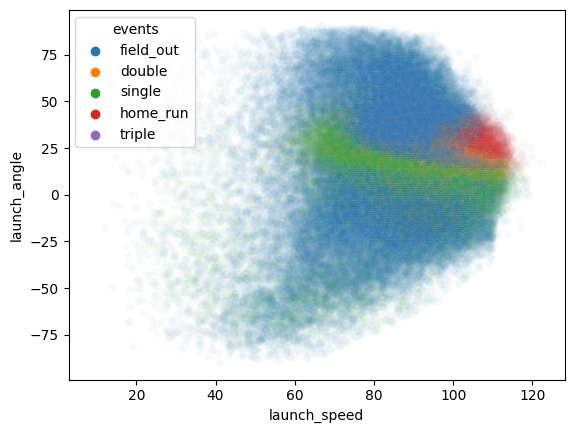

In [19]:
sns.scatterplot(data = hitting_df, x=hitting_df.launch_speed, y=hitting_df.launch_angle, hue = hitting_df.events, alpha = 0.03)

In [30]:
print('launch_speed max is ' + str(hitting_df["launch_speed"].max()))

print('launch_speed min is ' + str(hitting_df["launch_speed"].min()))

print('launch_angle max is ' + str(hitting_df["launch_angle"].max()))

print('launch_angle min is ' + str(hitting_df["launch_angle"].min()))

launch_speed max is 122.4
launch_speed min is 8.6
launch_angle max is 90.0
launch_angle min is -90.0


<Axes: xlabel='launch_speed_binned', ylabel='launch_angle_binned'>

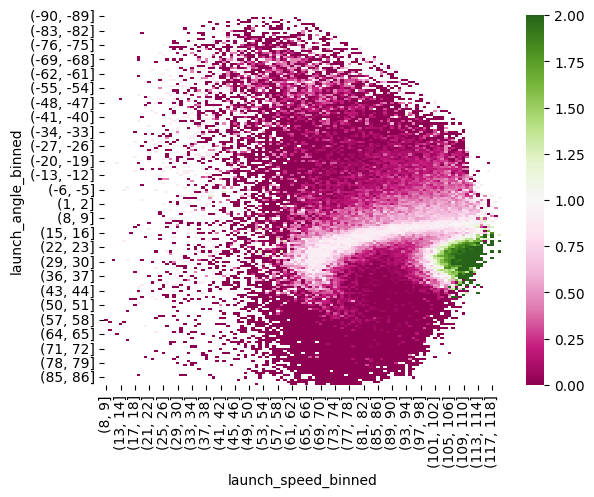

In [31]:
hitting_df_binned = hitting_df

#angles

bins = []
for i in range(-90, 90, 1):
    bins.append(i)

#print(bins)

hitting_df_binned['launch_angle_binned'] = pd.cut(hitting_df_binned['launch_angle'], bins)

#speed

bins = []
for i in range(8, 123, 1):
    bins.append(i)

#print(bins)

hitting_df_binned['launch_speed_binned'] = pd.cut(hitting_df_binned['launch_speed'], bins)

non_coors_new_rel_terms = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='launch_speed_binned', values='woba_value', aggfunc='mean')
sns.heatmap(non_coors_new_rel_terms, cmap="PiYG")

 **Drop columns with too high of a correlation to eliminate Bias**

In [20]:
display(hitting_df.corr(numeric_only=True))


,woba_value,launch_speed,launch_angle
woba_value,1.000000,0.302669,-0.004333
launch_speed,0.302669,1.000000,0.126440
launch_angle,-0.004333,0.126440,1.000000


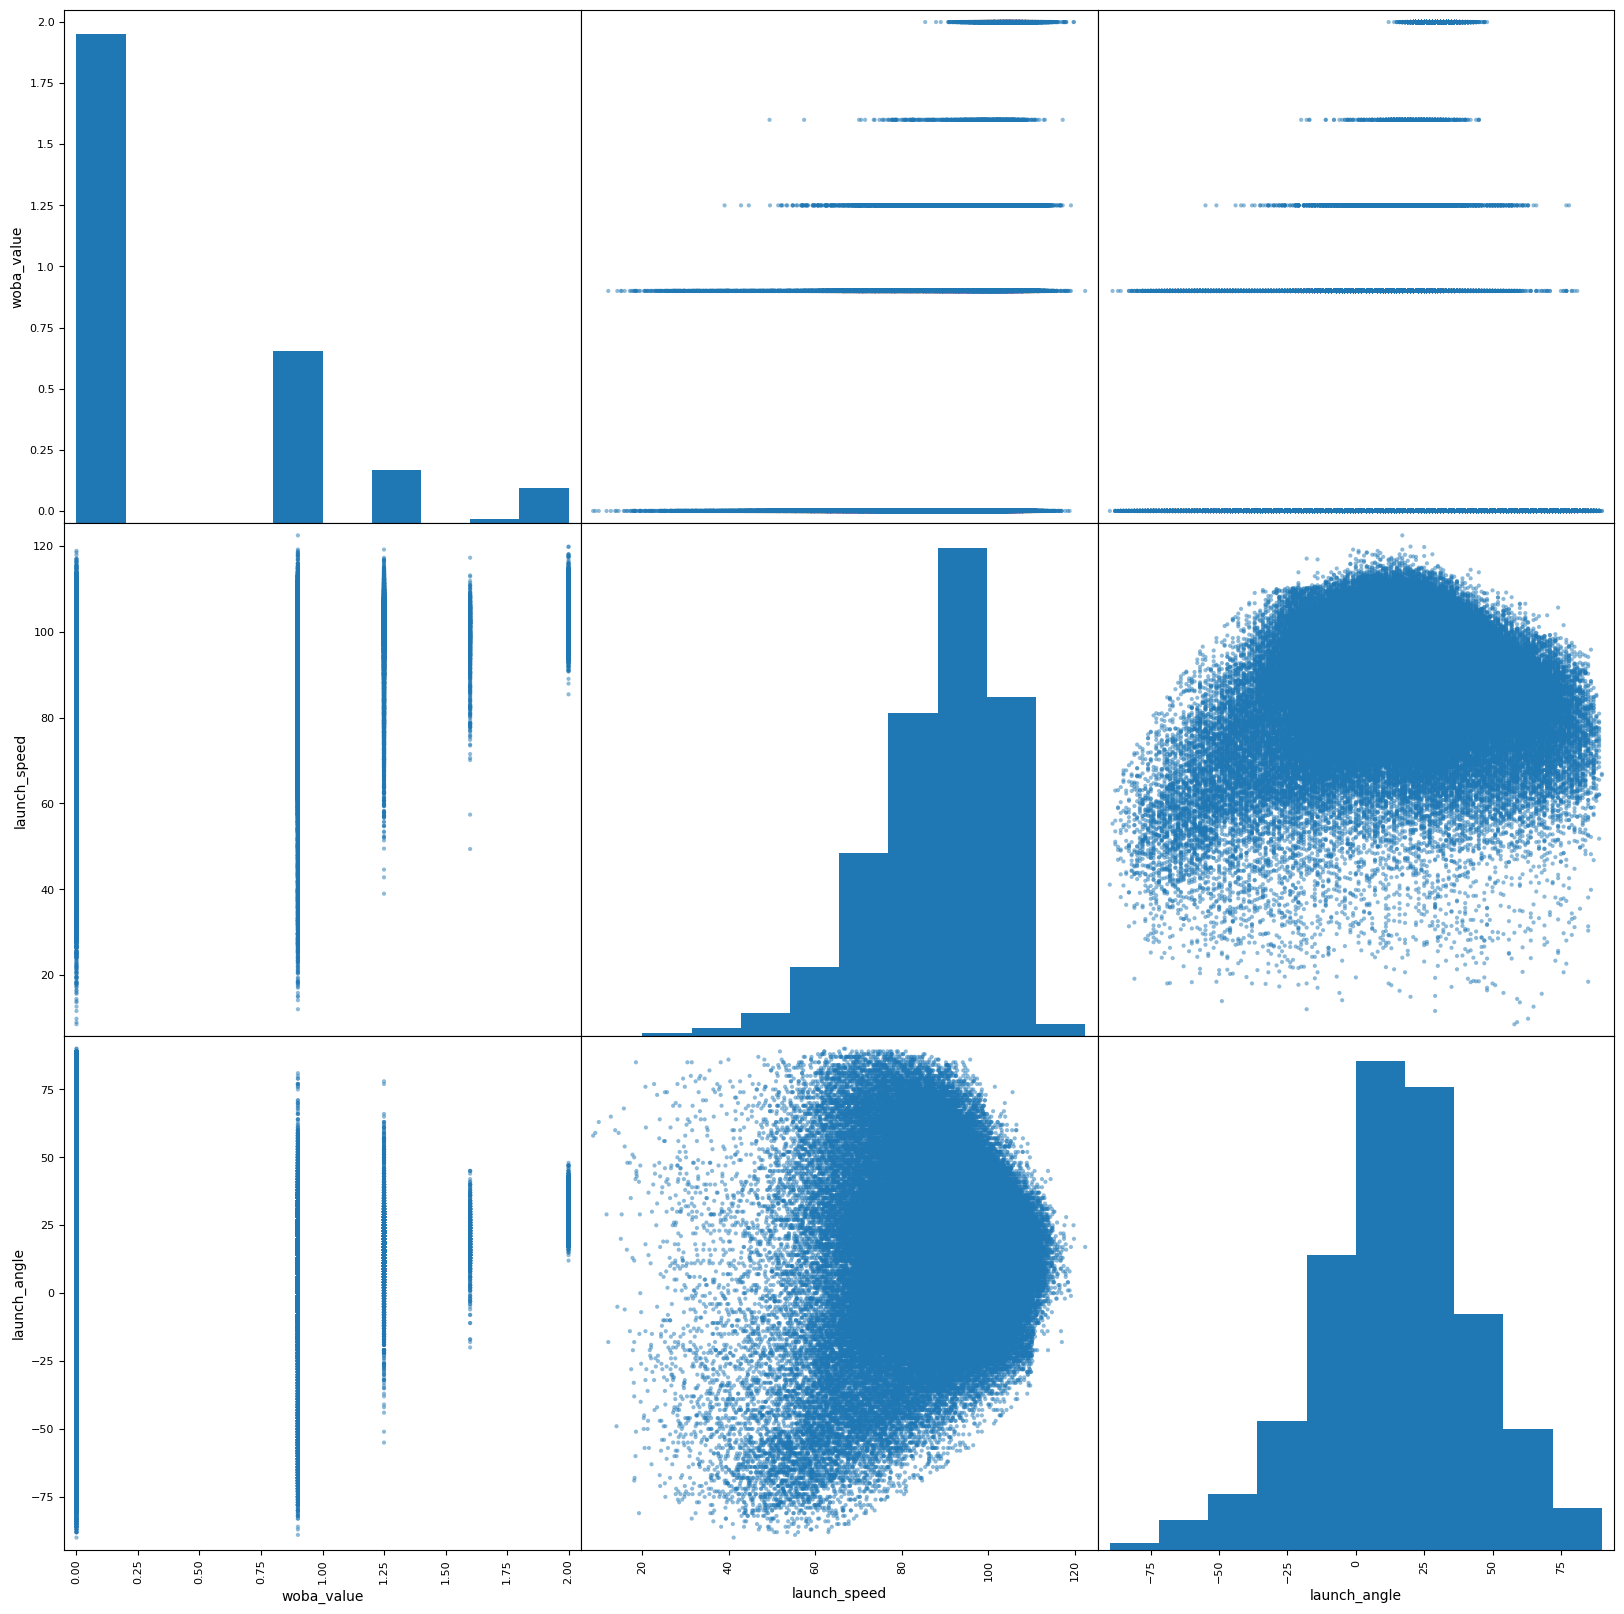

In [21]:
pd.plotting.scatter_matrix(hitting_df, figsize=(20, 20))
plt.show()

In [34]:
# maybe replace events for woba so no dummies?
# model_data = pd.get_dummies(hitting_df, dtype='int')
# model_data

#del hitting_df['launch_speed_binned']
#del hitting_df['launch_angle_binned']
#del hitting_df['events']
hitting_df

,woba_value,launch_speed,launch_angle
0,0.00,73.0,-19.0
15,1.25,92.1,26.0
25,0.00,48.6,26.0
36,0.00,65.4,-59.0
41,0.90,84.0,14.0
...,...,...,...
740588,0.00,102.8,5.0
740593,0.00,79.3,33.0
740597,0.90,93.5,2.0
740599,0.90,96.5,12.0


# **Machine Learning**

 **Train Test Split**

In [ ]:
# split 
feature_cols = ['launch_speed', 'launch_angle']

 **Feature Engineering**

 **Normailze**

 **One Hot Encode**

**Data Splitting**

 **Model Choice**

#  **Results**

 # **Future Analysis**